# Normal Equation example

In [3]:
# Important libs/imports
import numpy
import matplotlib.pyplot as plotter

In [4]:
# Create 100 samples of a single feature (1 column)
# Multiply by 2 to add some noise
# This has an uniform distribution
num_of_samples = 100
num_of_features = 1
X = 2 * numpy.random.rand(num_of_samples, num_of_features)

## Create normal distribution

In [5]:
# Use numpy's randn (n for normal)
# y = b + mX
# y = bias + (slope*X) + error/noise (which is normal distributed/gaussian)
y = 10 +(5*X) + numpy.random.randn(num_of_samples, num_of_features)
y.shape

(100, 1)

$$
f(x) -> y
$$

Text(0, 0.5, 'y')

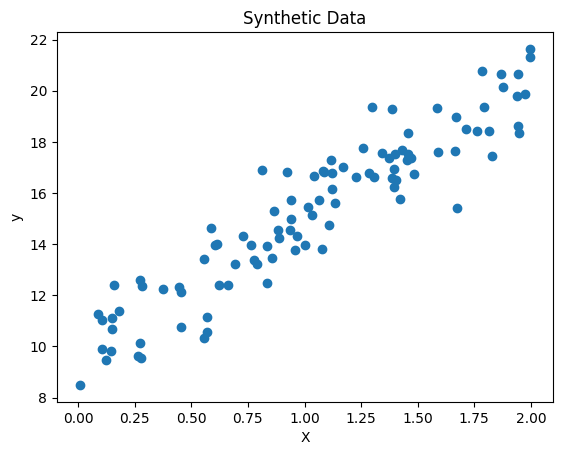

In [6]:
plotter.scatter(X, y)
plotter.title("Synthetic Data")
plotter.xlabel("X")
plotter.ylabel("y")

# Normal Equation
$$
\theta = (X^TX)^{-1} X^T y\\
X_{0} = 1\\
{\theta}_0X_0 = {\theta}_0
$$

In [7]:
# Need to add X_0 to our array, use numpy's magic using same-size array of ones + our existing dataset (EXAM QUESTION)
# numpy.c_ = concatenate, somehow they get charged for each character in the function name...
X_with_bias = numpy.c_[numpy.ones((num_of_samples, num_of_features)), X]
X_with_bias[0:5]

array([[1.        , 0.14793806],
       [1.        , 1.10860496],
       [1.        , 0.2836044 ],
       [1.        , 0.79015489],
       [1.        , 0.10358484]])

In [8]:
# Use numpy's built-in linear algebra functions

# Get inverse of a matrix
X_with_bias_transposed = X_with_bias.T
theta_array = numpy.linalg.inv(X_with_bias_transposed.dot(X_with_bias)).dot(X_with_bias_transposed).dot(y)

theta_array.shape
print(f'Theta(s):\n{theta_array}')

Theta(s):
[[9.79508043]
 [5.28588368]]


## Plot new model

X.shape(100, 1) y.shape(100, 1)


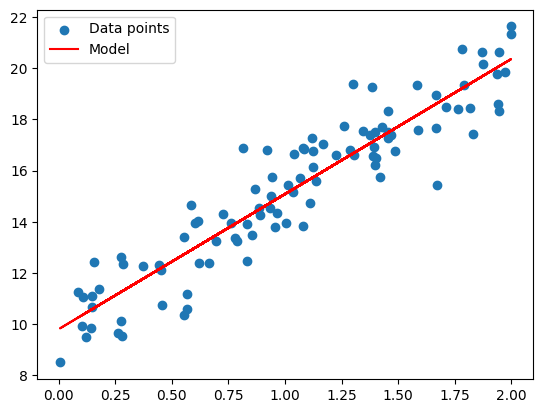

In [9]:
print(f'X.shape{X.shape} y.shape{y.shape}')
plotter.scatter(X, y, label="Data points")
plotter.plot(X, X_with_bias.dot(theta_array), c="r", label="Model")
plotter.legend()


## Try random data

In [10]:
X_test = numpy.array([
    [0],
    [2],
    [1.2]
])
X_test = numpy.c_[numpy.ones((3,1)), X_test]
X_test


array([[1. , 0. ],
       [1. , 2. ],
       [1. , 1.2]])

In [11]:
y_test = X_test.dot(theta_array)
y_test

array([[ 9.79508043],
       [20.36684779],
       [16.13814084]])

## Use SKLearn's Linear Regressions

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

model.intercept_, model.coef_

(array([9.79508043]), array([[5.28588368]]))

## Use SKLearn's Stochastic Gradient Descent

In [13]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X, y)
model.intercept_, model.coef_

c:\Users\bimartin\AppData\Local\miniconda3\envs\iteso_aprendizaje_automatico\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([9.27719407]), array([5.7160324]))

# Polynomial Regression/Features
(EXAM QUESTION): We add the square/other power of to the features, NOT PARAMETERS! ITS ADDED TO FEATURES
The 'linear' part belongs to the parameters (theta/bias) despite features being non-lienear (power higher of 1)
If theta/bias power is 1, the model is linear



array([[ 0.56740071],
       [-1.84446011],
       [-1.72701546],
       [-0.68798974],
       [-0.84950511]])

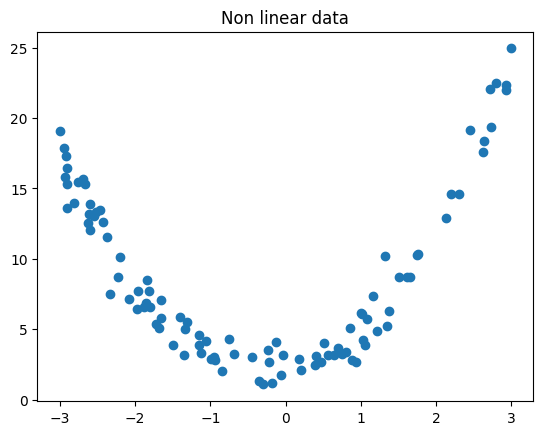

In [14]:
# Create random data, but now use polynomial behavior in features

X = 6 * numpy.random.rand(num_of_samples, num_of_features) - 3
y = 2 +(2*X**2) + X + numpy.random.randn(num_of_samples, num_of_features)
plotter.scatter(X, y)
plotter.title('Non linear data')

X[0:5]

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Need to convert our X dataset to polynomial

polynomial_example = PolynomialFeatures(
    degree=2,
    include_bias=False
)

X_polynomial = polynomial_example.fit_transform(X)
X_polynomial[0:5]

array([[ 0.56740071,  0.32194356],
       [-1.84446011,  3.40203311],
       [-1.72701546,  2.98258239],
       [-0.68798974,  0.47332989],
       [-0.84950511,  0.72165893]])

In [16]:
model = LinearRegression()
model.fit(X_polynomial, y)

print(f'Bias: {model.intercept_} weight:{model.coef_}')

Bias: [2.08501977] weight:[[1.0536923  2.05205126]]


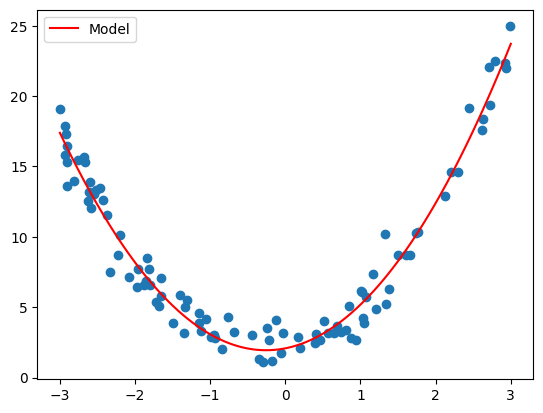

In [17]:
X_temp = numpy.linspace(-3, 3, 100).reshape(100, 1)
X_temp_poly = polynomial_example.transform(X_temp)

plotter.scatter(X, y)
plotter.plot(X_temp, model.predict(X_temp_poly), c='r', label='Model')
plotter.legend()
